<a href="https://colab.research.google.com/github/abzokhattab/Detect-Human-Eyes-in-Image/blob/main/CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class IntegralImage(object):
    def __init__(self, original):
        '''
        original list[list]: 2d array containing original table data
        '''
        width = len(original[0])
        height = len(original)
        self.table = [[0 for _ in range(width)] for _ in range(height)]

        for y in range(height):
            for x in range(width):
                self.table[y][x] = original[y][x] + self.get(x - 1, y) + self.get(x, y - 1) - self.get(x - 1, y - 1)

    def get(self, x, y):
        if x < -1 or y < -1 or x >= len(self.table[0]) or y >= len(self.table):
            raise ValueError("index out of bound for: ",x,y)
        elif x == -1 or y == -1:
            return 0
        else:
            return self.table[y][x]

    def CalculateLocalSum(self, x1, y1, x2, y2):
        ''' Sums a box at x1, y1 with width w and height h
        top left 
        x1 (int): x1 position of cell 
        y1 (int): y1 position of cell
        bottom right
        x2 (int): x2 position of cell
        y2 (int): y2 position of cell
        w (int): width of box to sum
        h (int): height of box to sum

        Returns int
        '''
        w = x2-x1  
        h = y2- y1   
        return self.get(x2, y2) - self.get(x2, y2 - h) - self.get(x2 - w, y2) + self.get(x2 - w, y2 - h)




In [ ]:
from PIL import Image
import numpy as np
import operator
import math


In [ ]:
 #ii.table
# test
print("integral image test")
import unittest
orig = [[5, 2, 3, 4, 1],
        [1, 5, 4, 2, 3],
        [2, 2, 1, 3, 4],
        [3, 5, 6, 4, 5],
        [4, 1, 3, 2, 6]]

#expected output
imag = [[5, 7, 10, 14, 15],
         [6, 13, 20, 26, 30],
         [8, 17, 25, 34, 42],
         [11, 25, 39, 52, 65],
         [15, 30, 47, 62, 81]]

test =    IntegralImage(orig)      
print(test.CalculateLocalSum(0,0,4,4))
test.table

integral image test
56


[[5, 7, 10, 14, 15],
 [6, 13, 20, 26, 30],
 [8, 17, 25, 34, 42],
 [11, 25, 39, 52, 65],
 [15, 30, 47, 62, 81]]

In [ ]:
def DetectEye(table,n):
  m=  math.floor(0.15 * n)
  starting_point = (math.floor(0.5*n) ,math.floor(0.5*m))
  x_max = -1 
  y_max = -1 
  max_value = -100000 ; 

  for y in range(starting_point[1],len(table.table)-math.floor(2*m)):
      for x in range(starting_point[0],len(table.table[0])-starting_point[0]):
        P1 = (math.floor(-0.5*n) + x,math.floor(-0.5*m) + y)
        P2 = (math.floor(-0.05*n) + x,0+  y)
        P3 = (math.floor(-0.5*n) + x, y)
        P4 = (math.floor(-0.05*n) + x,math.floor(0.5*m) + y)
        P5 = (math.floor(0.05*n) + x,math.floor(-0.5*m) + y)
        P6 = (math.floor(0.5*n) + x,0 + y) 
        P7 = (math.floor(0.05*n) + x,0 + y)
        P8 = (math.floor(0.5*n) + x,math.floor(0.5*m) + y) 
        P9 = (math.floor(-0.325*n) + x,math.floor(0.833*m) + y) 
        P10 = (math.floor(-0.225*n) + x,math.floor(2*m) + y)
        P11 = (math.floor(-0.1*n) + x,math.floor(0.833*m) + y)
        P12 = (math.floor(0.1*n) + x,math.floor(2*m) + y)
        P13 = (math.floor(0.225*n) + x,math.floor(0.833*m) + y)
        P14 = (math.floor(0.325*n) + x,math.floor(2*m) + y)

        #calc integral 
        ls1 = table.CalculateLocalSum(P1[0],P1[1],P2[0],P2[1])
        ls2 = table.CalculateLocalSum(P3[0],P3[1],P4[0],P4[1])
        ls3 = table.CalculateLocalSum(P5[0],P5[1],P6[0],P6[1])
        ls4 = table.CalculateLocalSum(P7[0],P7[1],P8[0],P8[1])
        ls5 = table.CalculateLocalSum(P9[0],P9[1],P10[0],P10[1])
        ls6 = table.CalculateLocalSum(P11[0],P11[1],P12[0],P12[1])
        ls7 = table.CalculateLocalSum(P13[0],P13[1],P14[0],P14[1])

        sum = ls1  - ls2 + ls3 - ls4 -  ls5 + ls6 - ls7

        if max_value < sum :
            max_value = sum 
            x_max = x
            y_max = y 

  print("max value is:",sum )
  return tuple(map(operator.sub, (x_max,y_max), starting_point))

In [ ]:
def ExtractDetectedEye(photo_sample,x,y,kernal_width):
  n= kernal_width
  m = round( 0.15 * n* 2.5)
  area = (x, y, n +x   , y+m )
  print(area)
  cropped_img = photo_sample.crop(area)
  display(cropped_img)
    

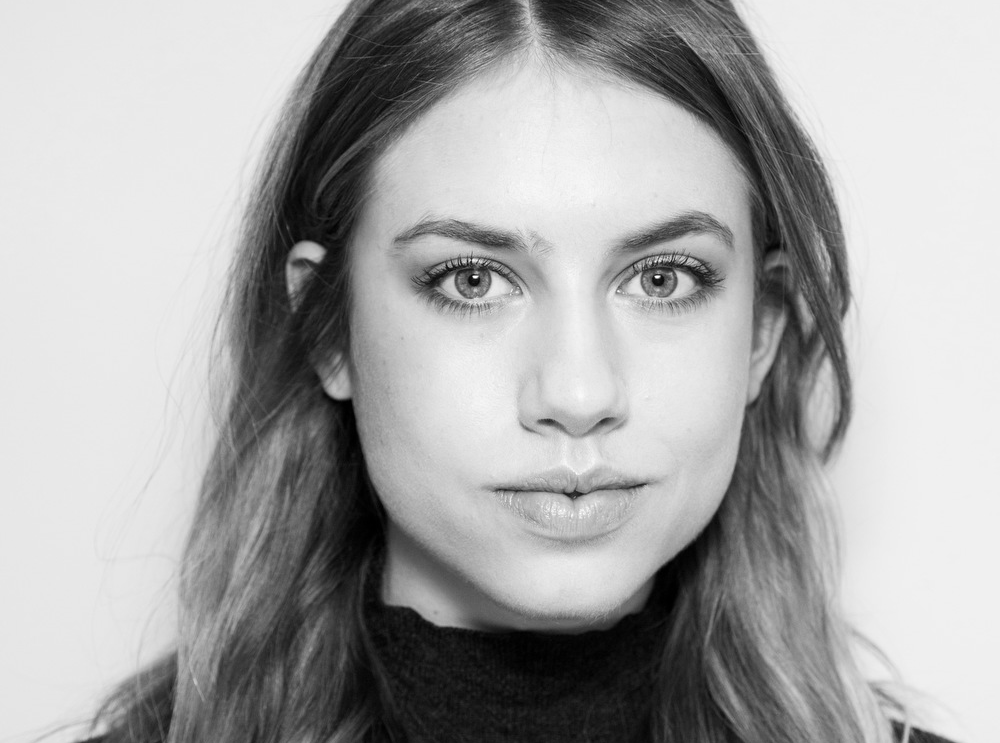

165 24 (-165, -25)
(0, -1) (148, 24) (0, 24) (148, 48) (181, -1) (330, 24) (181, 24) (330, 48) (57, 64) (90, 122) (132, 64) (198, 122) (239, 64) (272, 122)


ValueError: ignored

In [ ]:
first_image= Image.open('/content/f2.png').convert('L')
display(first_image)
first_image_array = np.array(first_image)
first_image_integral = IntegralImage(first_image_array)
first_image_kernal_size= 330
first_image_maxPoint = DetectEye(first_image_integral,first_image_kernal_size)
ExtractDetectedEye(first_image,first_image_maxPoint[0],first_image_maxPoint[1],first_image_kernal_size)

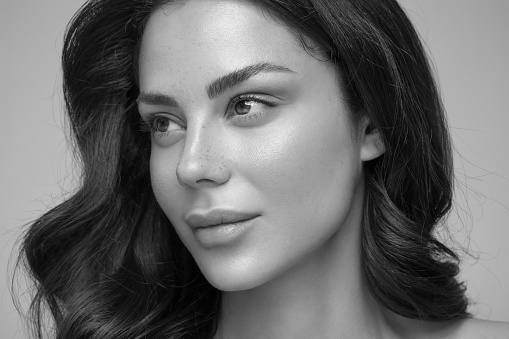

max value is: -37140
(126, 78, 276, 134)


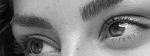

In [ ]:
second_image= Image.open('/content/f6.jpg').convert('L')
display(second_image)
second_image_array = np.array(second_image)
second_image_integral = IntegralImage(second_image_array)
second_image_kernal_size= 150
second_image_maxPoint = DetectEye(second_image_integral,second_image_kernal_size)
ExtractDetectedEye(second_image,second_image_maxPoint[0],second_image_maxPoint[1],second_image_kernal_size)

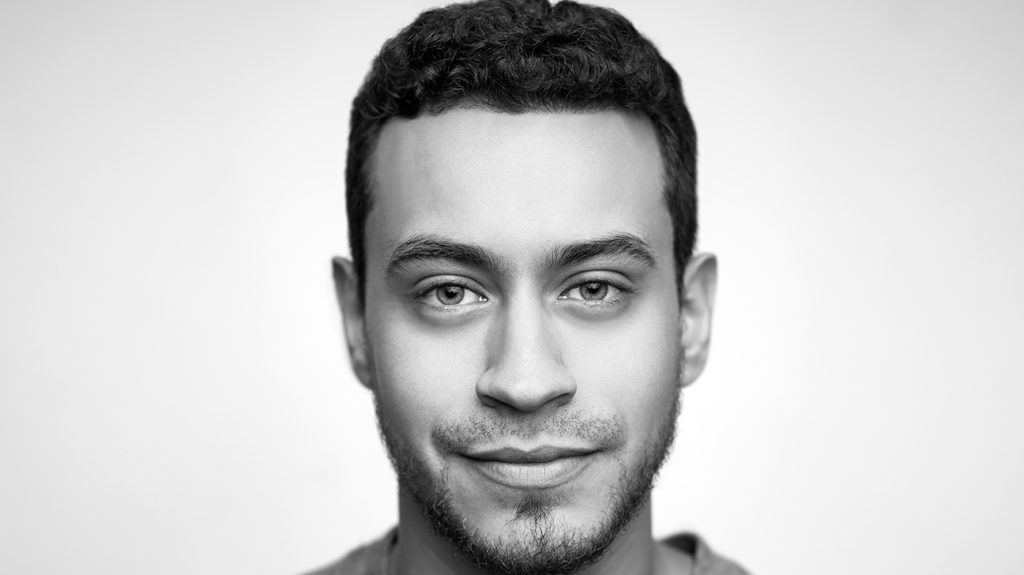

max value is: 58384
(398, 222, 648, 316)


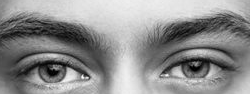

In [ ]:
third_image= Image.open('/content/f3.jpg').convert('L')
display(third_image)
third_image_array = np.array(third_image)
third_image_integral = IntegralImage(third_image_array)
third_image_kernal_size= 250
third_image_maxPoint = DetectEye(third_image_integral,third_image_kernal_size)
ExtractDetectedEye(third_image,third_image_maxPoint[0],third_image_maxPoint[1],third_image_kernal_size)

testing the kernal maximum value in a white image, the maximum score should be zero
max value is: 0
(0, 0, 120, 45)


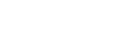

In [ ]:
print("testing the kernal maximum value in a white image, the maximum score should be zero")
fourth_image= Image.open('/content/white_image.png').convert('L')
display()
fourth_image_array = np.array(fourth_image)
fourth_image_integral = IntegralImage(fourth_image_array)
fourth_image_kernal_size= 120
fourth_image_maxPoint = DetectEye(fourth_image_integral,fourth_image_kernal_size)
ExtractDetectedEye(fourth_image,fourth_image_maxPoint[0],fourth_image_maxPoint[1],fourth_image_kernal_size)